<a href="https://colab.research.google.com/github/akshar99/AI-Trading/blob/main/MA-ST-RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [212]:
df = pd.read_csv('/content/drive/MyDrive/python/TEchAnalysis.csv')
df

,Unnamed: 0,Date,Day,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Percentage Change,Marker,Pivot,R1,R2,S1,S2,NIFTY,Moving Average 5,Moving Average 10,Moving Average 20,Moving Average 50,fib
0,0,2020-01-01,Wednesday,12202.15,12222.20,12165.30,12182.50,304078039,10445.68,-0.1965,Down,NaN,NaN,NaN,NaN,NaN,12182.50,NaN,NaN,NaN,NaN,-19.65
1,1,2020-01-02,Thursday,12198.55,12289.90,12195.25,12282.20,407697594,15256.55,0.8365,Up,12190.000000,12214.700000,12246.900000,12197.500000,12133.100000,12282.20,NaN,NaN,NaN,NaN,83.65
2,2,2020-01-03,Friday,12261.10,12265.60,12191.35,12226.65,428770054,16827.27,-0.3445,Down,12255.783333,12316.316667,12350.433333,12229.366667,12161.133333,12226.65,NaN,NaN,NaN,NaN,-34.45
3,3,2020-01-06,Monday,12170.60,12179.10,11974.20,11993.05,396501419,16869.22,-1.7755,Down,12227.866667,12264.383333,12302.116667,12229.083333,12153.616667,11993.05,NaN,NaN,NaN,NaN,-177.55
4,4,2020-01-07,Tuesday,12079.10,12152.15,12005.35,12052.95,447818617,17797.68,-0.2615,Down,12048.783333,12123.366667,12253.683333,12104.516667,11843.883333,12052.95,12162.877778,NaN,NaN,NaN,-26.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,2020-10-12,Monday,11973.55,12022.05,11867.20,11930.95,522627571,26586.47,-0.4260,Down,11886.000000,11966.800000,12019.400000,11857.800000,11752.600000,11930.95,11822.583333,11571.228,11296.60300,11392.69876,-42.60
196,196,2020-10-13,Tuesday,11934.65,11988.20,11888.90,11934.50,458304851,29403.22,-0.0015,Down,11940.066667,12012.933333,12094.916667,11949.183333,11785.216667,11934.50,11883.005556,11666.501,11328.39525,11395.96876,-0.15
197,197,2020-10-14,Wednesday,11917.40,11997.20,11822.15,11971.05,569245407,29940.62,0.5365,Up,11937.200000,11985.500000,12036.500000,11939.900000,11837.900000,11971.05,11921.766667,11752.834,11370.02500,11399.67684,53.65
198,198,2020-10-15,Thursday,12023.45,12025.45,11661.30,11680.35,608865041,35175.92,-3.4310,Down,11930.133333,12038.116667,12105.183333,11889.216667,11755.083333,11680.35,11911.338889,11818.656,11420.84400,11403.91100,-343.10


In [213]:
df.columns
df = df.set_index('Unnamed: 0')
df

,Date,Day,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Percentage Change,Marker,Pivot,R1,R2,S1,S2,NIFTY,Moving Average 5,Moving Average 10,Moving Average 20,Moving Average 50,fib
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,2020-01-01,Wednesday,12202.15,12222.20,12165.30,12182.50,304078039,10445.68,-0.1965,Down,NaN,NaN,NaN,NaN,NaN,12182.50,NaN,NaN,NaN,NaN,-19.65
1,2020-01-02,Thursday,12198.55,12289.90,12195.25,12282.20,407697594,15256.55,0.8365,Up,12190.000000,12214.700000,12246.900000,12197.500000,12133.100000,12282.20,NaN,NaN,NaN,NaN,83.65
2,2020-01-03,Friday,12261.10,12265.60,12191.35,12226.65,428770054,16827.27,-0.3445,Down,12255.783333,12316.316667,12350.433333,12229.366667,12161.133333,12226.65,NaN,NaN,NaN,NaN,-34.45
3,2020-01-06,Monday,12170.60,12179.10,11974.20,11993.05,396501419,16869.22,-1.7755,Down,12227.866667,12264.383333,12302.116667,12229.083333,12153.616667,11993.05,NaN,NaN,NaN,NaN,-177.55
4,2020-01-07,Tuesday,12079.10,12152.15,12005.35,12052.95,447818617,17797.68,-0.2615,Down,12048.783333,12123.366667,12253.683333,12104.516667,11843.883333,12052.95,12162.877778,NaN,NaN,NaN,-26.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2020-10-12,Monday,11973.55,12022.05,11867.20,11930.95,522627571,26586.47,-0.4260,Down,11886.000000,11966.800000,12019.400000,11857.800000,11752.600000,11930.95,11822.583333,11571.228,11296.60300,11392.69876,-42.60
196,2020-10-13,Tuesday,11934.65,11988.20,11888.90,11934.50,458304851,29403.22,-0.0015,Down,11940.066667,12012.933333,12094.916667,11949.183333,11785.216667,11934.50,11883.005556,11666.501,11328.39525,11395.96876,-0.15
197,2020-10-14,Wednesday,11917.40,11997.20,11822.15,11971.05,569245407,29940.62,0.5365,Up,11937.200000,11985.500000,12036.500000,11939.900000,11837.900000,11971.05,11921.766667,11752.834,11370.02500,11399.67684,53.65


In [214]:
df['Index'] = df.index

In [215]:
df

,Date,Day,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Percentage Change,Marker,Pivot,R1,R2,S1,S2,NIFTY,Moving Average 5,Moving Average 10,Moving Average 20,Moving Average 50,fib,Index
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,
0,2020-01-01,Wednesday,12202.15,12222.20,12165.30,12182.50,304078039,10445.68,-0.1965,Down,NaN,NaN,NaN,NaN,NaN,12182.50,NaN,NaN,NaN,NaN,-19.65,0
1,2020-01-02,Thursday,12198.55,12289.90,12195.25,12282.20,407697594,15256.55,0.8365,Up,12190.000000,12214.700000,12246.900000,12197.500000,12133.100000,12282.20,NaN,NaN,NaN,NaN,83.65,1
2,2020-01-03,Friday,12261.10,12265.60,12191.35,12226.65,428770054,16827.27,-0.3445,Down,12255.783333,12316.316667,12350.433333,12229.366667,12161.133333,12226.65,NaN,NaN,NaN,NaN,-34.45,2
3,2020-01-06,Monday,12170.60,12179.10,11974.20,11993.05,396501419,16869.22,-1.7755,Down,12227.866667,12264.383333,12302.116667,12229.083333,12153.616667,11993.05,NaN,NaN,NaN,NaN,-177.55,3
4,2020-01-07,Tuesday,12079.10,12152.15,12005.35,12052.95,447818617,17797.68,-0.2615,Down,12048.783333,12123.366667,12253.683333,12104.516667,11843.883333,12052.95,12162.877778,NaN,NaN,NaN,-26.15,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2020-10-12,Monday,11973.55,12022.05,11867.20,11930.95,522627571,26586.47,-0.4260,Down,11886.000000,11966.800000,12019.400000,11857.800000,11752.600000,11930.95,11822.583333,11571.228,11296.60300,11392.69876,-42.60,195
196,2020-10-13,Tuesday,11934.65,11988.20,11888.90,11934.50,458304851,29403.22,-0.0015,Down,11940.066667,12012.933333,12094.916667,11949.183333,11785.216667,11934.50,11883.005556,11666.501,11328.39525,11395.96876,-0.15,196
197,2020-10-14,Wednesday,11917.40,11997.20,11822.15,11971.05,569245407,29940.62,0.5365,Up,11937.200000,11985.500000,12036.500000,11939.900000,11837.900000,11971.05,11921.766667,11752.834,11370.02500,11399.67684,53.65,197


In [216]:
def iSupport(df , i):
  support = df['Low'][i] < df['Low'][i-1] and df['Low'][i] < df['Low'][i+1] and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]
  return support

In [217]:
def iResistance(df, i):
  resistance = df['High'][i] < df['High'][i-1] and df['High'][i] < df['High'][i+1] and df['High'][i+1] < df['High'][i+2] and df['High'][i-1] < df['High'][i-2]
  return resistance 

In [218]:
levels = []
for i in range(2 , df.shape[0]-2):
  if iSupport(df , i):
    levels.append((i , df['Low'][i]))
  elif iResistance(df ,i):
    levels.append((i , df['High'][i]))  

In [272]:
levels

[(5, 12044.95),
 (15, 12087.9),
 (24, 11614.5),
 (29, 11990.75),
 (35, 11908.05),
 (58, 7511.1),
 (65, 8055.8),
 (71, 8821.9),
 (84, 9116.5),
 (85, 9277.85),
 (92, 8806.75),
 (93, 9030.35),
 (110, 9544.35),
 (141, 11225.0),
 (146, 10882.25),
 (184, 10790.2)]

In [219]:
levels
level = np.array(levels)

In [220]:
level

array([[5.000000e+00, 1.204495e+04],
       [1.500000e+01, 1.208790e+04],
       [2.400000e+01, 1.161450e+04],
       [2.900000e+01, 1.199075e+04],
       [3.500000e+01, 1.190805e+04],
       [5.800000e+01, 7.511100e+03],
       [6.500000e+01, 8.055800e+03],
       [7.100000e+01, 8.821900e+03],
       [8.400000e+01, 9.116500e+03],
       [8.500000e+01, 9.277850e+03],
       [9.200000e+01, 8.806750e+03],
       [9.300000e+01, 9.030350e+03],
       [1.100000e+02, 9.544350e+03],
       [1.410000e+02, 1.122500e+04],
       [1.460000e+02, 1.088225e+04],
       [1.840000e+02, 1.079020e+04]])

In [221]:
column = ['a' , 'b']
level_df = pd.DataFrame(data=level , columns=column)
level_df

,a,b
0,5.0,12044.95
1,15.0,12087.90
2,24.0,11614.50
3,29.0,11990.75
4,35.0,11908.05
5,58.0,7511.10
6,65.0,8055.80
7,71.0,8821.90
8,84.0,9116.50
9,85.0,9277.85


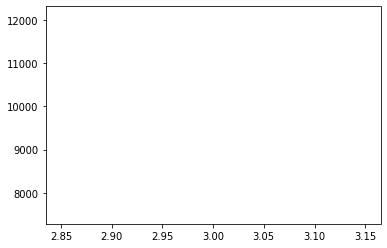

In [222]:
plt.hlines(y =level_df['b'] , xmin=3 , xmax=3)

In [223]:
def plot_all():
  fig, ax = plt.subplots()
  candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)
  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()
  fig.tight_layout()
  for level in levels:
    plt.hlines(level[1],xmin=df['Date'][level[0]],\
               xmax=max(df['Date']),colors='blue')
  fig.show()

No handles with labels found to put in legend.


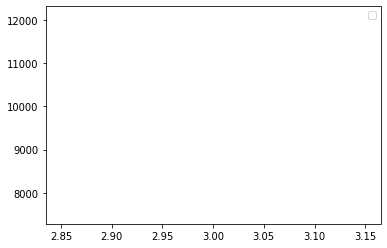

In [224]:
plt.hlines(y=level_df['b'] , xmin=3 , xmax=3)
plt.legend()

In [225]:
import plotly.graph_objects as go




In [226]:
fig  = go.Figure(data=[go.Candlestick(x=df['Date'], open = df['Open'] , high=df['High'] , low = df['Low'] , close=df['Close'])])

fig.show()


In [227]:
level_df

,a,b
0,5.0,12044.95
1,15.0,12087.90
2,24.0,11614.50
3,29.0,11990.75
4,35.0,11908.05
5,58.0,7511.10
6,65.0,8055.80
7,71.0,8821.90
8,84.0,9116.50
9,85.0,9277.85


In [228]:
df.Date[5]

'2020-01-08'

In [229]:
a = []
for i in range(len(level_df['a'])):
  c = level_df.a[i]
  a.append(df.Date[c])

In [230]:
a

['2020-01-08',
 '2020-01-22',
 '2020-02-03',
 '2020-02-10',
 '2020-02-18',
 '2020-03-24',
 '2020-04-03',
 '2020-04-16',
 '2020-05-06',
 '2020-05-07',
 '2020-05-18',
 '2020-05-19',
 '2020-06-12',
 '2020-07-27',
 '2020-08-03',
 '2020-09-24']

In [231]:
level_df['Date'] = a

In [232]:
level_df

,a,b,Date
0,5.0,12044.95,2020-01-08
1,15.0,12087.90,2020-01-22
2,24.0,11614.50,2020-02-03
3,29.0,11990.75,2020-02-10
4,35.0,11908.05,2020-02-18
5,58.0,7511.10,2020-03-24
6,65.0,8055.80,2020-04-03
7,71.0,8821.90,2020-04-16
8,84.0,9116.50,2020-05-06
9,85.0,9277.85,2020-05-07


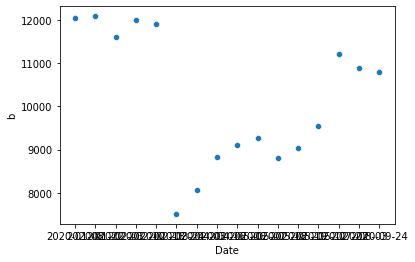

In [233]:
sns.scatterplot(x='Date' , y='b' , data=level_df)

No handles with labels found to put in legend.


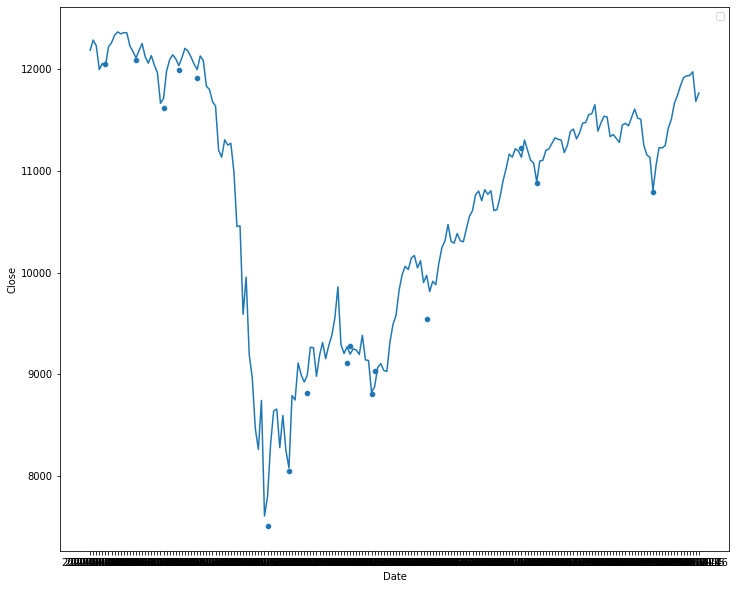

In [234]:
figdims = (12,10)
fig ,ax = plt.subplots(figsize=figdims)
sns.lineplot(data=df , x='Date' ,y='Close' , ax=ax )
sns.scatterplot(x='Date' , y='b' , data = level_df, ax=ax)
plt.legend()

In [235]:
#n= no. of days
def ATR(df , n):
  df['H-L'] = abs(df['High'] - df['Low'])
  df['H-PC'] = abs(df['High'] - df['Close'].shift(1))
  df['L-PC'] = abs(df['Low'] - df['Close'].shift(1)) 
  df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1)
  df['ATR'] = np.nan
  df['ATR'].iloc[n-1] = df['TR'][:n-1].mean()
  for i in range(n , len(df)):
    df['ATR'][i]=(df['ATR'][i-1]*(n-1)+ df['TR'][i])/n
  return

In [236]:
ATR(df , 14)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [237]:
print(ATR(df,14))

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



None


In [238]:
df

,Date,Day,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Percentage Change,Marker,Pivot,R1,R2,S1,S2,NIFTY,Moving Average 5,Moving Average 10,Moving Average 20,Moving Average 50,fib,Index,H-L,H-PC,L-PC,TR,ATR
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2020-01-01,Wednesday,12202.15,12222.20,12165.30,12182.50,304078039,10445.68,-0.1965,Down,NaN,NaN,NaN,NaN,NaN,12182.50,NaN,NaN,NaN,NaN,-19.65,0,56.90,NaN,NaN,56.90,NaN
1,2020-01-02,Thursday,12198.55,12289.90,12195.25,12282.20,407697594,15256.55,0.8365,Up,12190.000000,12214.700000,12246.900000,12197.500000,12133.100000,12282.20,NaN,NaN,NaN,NaN,83.65,1,94.65,107.40,12.75,107.40,NaN
2,2020-01-03,Friday,12261.10,12265.60,12191.35,12226.65,428770054,16827.27,-0.3445,Down,12255.783333,12316.316667,12350.433333,12229.366667,12161.133333,12226.65,NaN,NaN,NaN,NaN,-34.45,2,74.25,16.60,90.85,90.85,NaN
3,2020-01-06,Monday,12170.60,12179.10,11974.20,11993.05,396501419,16869.22,-1.7755,Down,12227.866667,12264.383333,12302.116667,12229.083333,12153.616667,11993.05,NaN,NaN,NaN,NaN,-177.55,3,204.90,47.55,252.45,252.45,NaN
4,2020-01-07,Tuesday,12079.10,12152.15,12005.35,12052.95,447818617,17797.68,-0.2615,Down,12048.783333,12123.366667,12253.683333,12104.516667,11843.883333,12052.95,12162.877778,NaN,NaN,NaN,-26.15,4,146.80,159.10,12.30,159.10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2020-10-12,Monday,11973.55,12022.05,11867.20,11930.95,522627571,26586.47,-0.4260,Down,11886.000000,11966.800000,12019.400000,11857.800000,11752.600000,11930.95,11822.583333,11571.228,11296.60300,11392.69876,-42.60,195,154.85,107.85,47.00,154.85,167.173623
196,2020-10-13,Tuesday,11934.65,11988.20,11888.90,11934.50,458304851,29403.22,-0.0015,Down,11940.066667,12012.933333,12094.916667,11949.183333,11785.216667,11934.50,11883.005556,11666.501,11328.39525,11395.96876,-0.15,196,99.30,57.25,42.05,99.30,162.325507
197,2020-10-14,Wednesday,11917.40,11997.20,11822.15,11971.05,569245407,29940.62,0.5365,Up,11937.200000,11985.500000,12036.500000,11939.900000,11837.900000,11971.05,11921.766667,11752.834,11370.02500,11399.67684,53.65,197,175.05,62.70,112.35,175.05,163.234399


In [239]:
dfd = df

In [240]:
dfd = dfd.drop(columns=['H-L' , 'H-PC' , 'L-PC'])

In [241]:
dfd

,Date,Day,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Percentage Change,Marker,Pivot,R1,R2,S1,S2,NIFTY,Moving Average 5,Moving Average 10,Moving Average 20,Moving Average 50,fib,Index,TR,ATR
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,
0,2020-01-01,Wednesday,12202.15,12222.20,12165.30,12182.50,304078039,10445.68,-0.1965,Down,NaN,NaN,NaN,NaN,NaN,12182.50,NaN,NaN,NaN,NaN,-19.65,0,56.90,NaN
1,2020-01-02,Thursday,12198.55,12289.90,12195.25,12282.20,407697594,15256.55,0.8365,Up,12190.000000,12214.700000,12246.900000,12197.500000,12133.100000,12282.20,NaN,NaN,NaN,NaN,83.65,1,107.40,NaN
2,2020-01-03,Friday,12261.10,12265.60,12191.35,12226.65,428770054,16827.27,-0.3445,Down,12255.783333,12316.316667,12350.433333,12229.366667,12161.133333,12226.65,NaN,NaN,NaN,NaN,-34.45,2,90.85,NaN
3,2020-01-06,Monday,12170.60,12179.10,11974.20,11993.05,396501419,16869.22,-1.7755,Down,12227.866667,12264.383333,12302.116667,12229.083333,12153.616667,11993.05,NaN,NaN,NaN,NaN,-177.55,3,252.45,NaN
4,2020-01-07,Tuesday,12079.10,12152.15,12005.35,12052.95,447818617,17797.68,-0.2615,Down,12048.783333,12123.366667,12253.683333,12104.516667,11843.883333,12052.95,12162.877778,NaN,NaN,NaN,-26.15,4,159.10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2020-10-12,Monday,11973.55,12022.05,11867.20,11930.95,522627571,26586.47,-0.4260,Down,11886.000000,11966.800000,12019.400000,11857.800000,11752.600000,11930.95,11822.583333,11571.228,11296.60300,11392.69876,-42.60,195,154.85,167.173623
196,2020-10-13,Tuesday,11934.65,11988.20,11888.90,11934.50,458304851,29403.22,-0.0015,Down,11940.066667,12012.933333,12094.916667,11949.183333,11785.216667,11934.50,11883.005556,11666.501,11328.39525,11395.96876,-0.15,196,99.30,162.325507
197,2020-10-14,Wednesday,11917.40,11997.20,11822.15,11971.05,569245407,29940.62,0.5365,Up,11937.200000,11985.500000,12036.500000,11939.900000,11837.900000,11971.05,11921.766667,11752.834,11370.02500,11399.67684,53.65,197,175.05,163.234399


In [242]:
dfd = dfd.drop(columns=['Index'])

In [243]:
dfd

,Date,Day,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Percentage Change,Marker,Pivot,R1,R2,S1,S2,NIFTY,Moving Average 5,Moving Average 10,Moving Average 20,Moving Average 50,fib,TR,ATR
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,
0,2020-01-01,Wednesday,12202.15,12222.20,12165.30,12182.50,304078039,10445.68,-0.1965,Down,NaN,NaN,NaN,NaN,NaN,12182.50,NaN,NaN,NaN,NaN,-19.65,56.90,NaN
1,2020-01-02,Thursday,12198.55,12289.90,12195.25,12282.20,407697594,15256.55,0.8365,Up,12190.000000,12214.700000,12246.900000,12197.500000,12133.100000,12282.20,NaN,NaN,NaN,NaN,83.65,107.40,NaN
2,2020-01-03,Friday,12261.10,12265.60,12191.35,12226.65,428770054,16827.27,-0.3445,Down,12255.783333,12316.316667,12350.433333,12229.366667,12161.133333,12226.65,NaN,NaN,NaN,NaN,-34.45,90.85,NaN
3,2020-01-06,Monday,12170.60,12179.10,11974.20,11993.05,396501419,16869.22,-1.7755,Down,12227.866667,12264.383333,12302.116667,12229.083333,12153.616667,11993.05,NaN,NaN,NaN,NaN,-177.55,252.45,NaN
4,2020-01-07,Tuesday,12079.10,12152.15,12005.35,12052.95,447818617,17797.68,-0.2615,Down,12048.783333,12123.366667,12253.683333,12104.516667,11843.883333,12052.95,12162.877778,NaN,NaN,NaN,-26.15,159.10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2020-10-12,Monday,11973.55,12022.05,11867.20,11930.95,522627571,26586.47,-0.4260,Down,11886.000000,11966.800000,12019.400000,11857.800000,11752.600000,11930.95,11822.583333,11571.228,11296.60300,11392.69876,-42.60,154.85,167.173623
196,2020-10-13,Tuesday,11934.65,11988.20,11888.90,11934.50,458304851,29403.22,-0.0015,Down,11940.066667,12012.933333,12094.916667,11949.183333,11785.216667,11934.50,11883.005556,11666.501,11328.39525,11395.96876,-0.15,99.30,162.325507
197,2020-10-14,Wednesday,11917.40,11997.20,11822.15,11971.05,569245407,29940.62,0.5365,Up,11937.200000,11985.500000,12036.500000,11939.900000,11837.900000,11971.05,11921.766667,11752.834,11370.02500,11399.67684,53.65,175.05,163.234399


In [244]:
dfd.describe()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Percentage Change,Pivot,R1,R2,S1,S2,NIFTY,Moving Average 5,Moving Average 10,Moving Average 20,Moving Average 50,fib,TR,ATR
count,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000,199.000000,199.000000,199.000000,199.000000,199.000000,200.000000,196.000000,191.000000,181.000000,151.000000,200.000000,200.000000,187.000000
mean,10740.618500,10824.393000,10627.406500,10721.506250,6.787893e+08,29908.728850,-0.191123,10719.331826,10816.485511,10916.695645,10722.388275,10521.968007,10721.506250,10695.496429,10661.233602,10591.317767,10363.115783,-19.112250,228.513750,231.786632
std,1202.256228,1152.790328,1240.383125,1195.977107,2.081293e+08,7865.208383,1.603401,1195.170443,1154.419696,1116.612628,1196.510044,1289.788755,1195.977107,1182.851613,1168.648000,1127.925841,940.426498,160.340136,191.965189,113.340550
min,7735.150000,8036.950000,7511.100000,7610.250000,3.040780e+08,10445.680000,-6.196500,7783.033333,7985.133333,8308.883333,7765.016667,7208.716667,7610.250000,8056.116667,8226.092000,8430.617750,8950.645360,-619.650000,56.900000,108.703571
25%,9692.087500,9940.412500,9535.262500,9823.037500,5.561201e+08,26023.637500,-0.875750,9767.266667,9925.691667,10045.508333,9748.183333,9346.875000,9823.037500,9646.275000,9498.892000,9376.620250,9429.523460,-87.575000,124.287500,153.547460
50%,11154.925000,11235.000000,11083.400000,11132.675000,6.447893e+08,30292.720000,-0.068250,11151.683333,11239.750000,11305.050000,11152.233333,10960.866667,11132.675000,11113.558333,11106.304000,10948.987000,10442.964800,-6.825000,168.975000,180.175034
75%,11635.900000,11702.000000,11570.575000,11651.162500,7.431377e+08,34958.882500,0.564875,11623.475000,11689.250000,11745.050000,11613.250000,11481.291667,11651.162500,11536.444444,11481.772500,11430.276750,11246.081300,56.487500,253.037500,264.608635
max,12430.500000,12430.500000,12321.400000,12362.300000,1.811564e+09,61668.550000,8.476000,12353.450000,12391.100000,12504.250000,12356.750000,12289.016667,12362.300000,12349.711111,12314.161000,12243.070000,12020.160720,847.600000,1604.250000,535.664683


In [245]:
def SuperT(df, f, n):
  df['Upper Basic'] = (df['High'] +df['Low'])/2 +(f*df['ATR'])
  df['Lower Basic'] = (df['High']+ df['Low'])/2 -(f*df['ATR'])
  df['Upper Band'] = df['Upper Basic']
  df['Lower Band'] = df['Lower Basic']
  for i in range(n ,len(df)):
    if df['Close'][i-1] <= df['Upper Band'][i-1]:
      df['Upper Band'][i] = min(df['Upper Basic'][i] , df['Upper Band'][i-1])
    else :
      df['Upper Band'][i] = df['Upper Basic'][i]  
  for i in range(n ,len(df)):
    if df['Close'][i-1] >= df['Lower Band'][i-1]:
      df['Lower Band'][i] = max(df['Lower Basic'][i] , df['Lower Band'][i-1])
    else :
      df['Lower Band'][i] = df['Lower Basic'][i] 
  df['SuperTrend'] =np.nan
  for i in df['SuperTrend']:
    i = len(df['Close']) - 1
    if df['Close'][n-1]<= df['Upper Band'][n-1]:
      df['SuperTrend'][n-1] = df['Upper Band'][n-1]    
    elif df['Close'][n-1]>df['Upper Band'][i]:
      df['SuperTrend'][n-1]=df['Lower Band'][n-1]
  for i in range(n,len(df)):
    if df['SuperTrend'][i-1]==df['Upper Band'][i-1] and df['Close'][i]<=df['Upper Band'][i]:
      df['SuperTrend'][i]=df['Upper Band'][i]
    elif  df['SuperTrend'][i-1]==df['Upper Band'][i-1] and df['Close'][i]>=df['Upper Band'][i]:
      df['SuperTrend'][i]=df['Lower Band'][i]
    elif df['SuperTrend'][i-1]==df['Lower Band'][i-1] and df['Close'][i]>=df['Lower Band'][i]:
      df['SuperTrend'][i]=df['Lower Band'][i]
    elif df['SuperTrend'][i-1]==df['Lower Band'][i-1] and df['Close'][i]<=df['Lower Band'][i]:
      df['SuperTrend'][i]=df['Upper Band'][i]
    return  


In [246]:
SuperT(dfd , 3 ,7)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is tryin

In [247]:
dfd

,Date,Day,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Percentage Change,Marker,Pivot,R1,R2,S1,S2,NIFTY,Moving Average 5,Moving Average 10,Moving Average 20,Moving Average 50,fib,TR,ATR,Upper Basic,Lower Basic,Upper Band,Lower Band,SuperTrend
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2020-01-01,Wednesday,12202.15,12222.20,12165.30,12182.50,304078039,10445.68,-0.1965,Down,NaN,NaN,NaN,NaN,NaN,12182.50,NaN,NaN,NaN,NaN,-19.65,56.90,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,Thursday,12198.55,12289.90,12195.25,12282.20,407697594,15256.55,0.8365,Up,12190.000000,12214.700000,12246.900000,12197.500000,12133.100000,12282.20,NaN,NaN,NaN,NaN,83.65,107.40,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,Friday,12261.10,12265.60,12191.35,12226.65,428770054,16827.27,-0.3445,Down,12255.783333,12316.316667,12350.433333,12229.366667,12161.133333,12226.65,NaN,NaN,NaN,NaN,-34.45,90.85,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-06,Monday,12170.60,12179.10,11974.20,11993.05,396501419,16869.22,-1.7755,Down,12227.866667,12264.383333,12302.116667,12229.083333,12153.616667,11993.05,NaN,NaN,NaN,NaN,-177.55,252.45,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-07,Tuesday,12079.10,12152.15,12005.35,12052.95,447818617,17797.68,-0.2615,Down,12048.783333,12123.366667,12253.683333,12104.516667,11843.883333,12052.95,12162.877778,NaN,NaN,NaN,-26.15,159.10,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2020-10-12,Monday,11973.55,12022.05,11867.20,11930.95,522627571,26586.47,-0.4260,Down,11886.000000,11966.800000,12019.400000,11857.800000,11752.600000,11930.95,11822.583333,11571.228,11296.60300,11392.69876,-42.60,154.85,167.173623,12446.145868,11443.104132,12144.21705,11443.104132,NaN
196,2020-10-13,Tuesday,11934.65,11988.20,11888.90,11934.50,458304851,29403.22,-0.0015,Down,11940.066667,12012.933333,12094.916667,11949.183333,11785.216667,11934.50,11883.005556,11666.501,11328.39525,11395.96876,-0.15,99.30,162.325507,12425.526520,11451.573480,12144.21705,11451.573480,NaN
197,2020-10-14,Wednesday,11917.40,11997.20,11822.15,11971.05,569245407,29940.62,0.5365,Up,11937.200000,11985.500000,12036.500000,11939.900000,11837.900000,11971.05,11921.766667,11752.834,11370.02500,11399.67684,53.65,175.05,163.234399,12399.378197,11419.971803,12144.21705,11451.573480,NaN


No handles with labels found to put in legend.


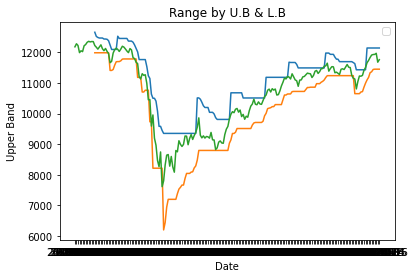

In [352]:
sns.lineplot(x=dfd['Date'] , y=dfd['Upper Band'])
sns.lineplot(x=dfd['Date'] , y=dfd['Lower Band'])
sns.lineplot(x=dfd['Date'] , y=dfd['Close'])
plt.title('Range by U.B & L.B')
plt.legend()

In [249]:
for i in range(len(dfd['Close'])):
  if dfd['Close'][i] <= dfd['Upper Band'][i]:
    dfd['SuperTrend'][i] = dfd['Upper Band'][i]
  else :
    dfd['SuperTrend'][i] = dfd['Lower Band'][i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [250]:
dfd

,Date,Day,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Percentage Change,Marker,Pivot,R1,R2,S1,S2,NIFTY,Moving Average 5,Moving Average 10,Moving Average 20,Moving Average 50,fib,TR,ATR,Upper Basic,Lower Basic,Upper Band,Lower Band,SuperTrend
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2020-01-01,Wednesday,12202.15,12222.20,12165.30,12182.50,304078039,10445.68,-0.1965,Down,NaN,NaN,NaN,NaN,NaN,12182.50,NaN,NaN,NaN,NaN,-19.65,56.90,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,Thursday,12198.55,12289.90,12195.25,12282.20,407697594,15256.55,0.8365,Up,12190.000000,12214.700000,12246.900000,12197.500000,12133.100000,12282.20,NaN,NaN,NaN,NaN,83.65,107.40,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,Friday,12261.10,12265.60,12191.35,12226.65,428770054,16827.27,-0.3445,Down,12255.783333,12316.316667,12350.433333,12229.366667,12161.133333,12226.65,NaN,NaN,NaN,NaN,-34.45,90.85,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-06,Monday,12170.60,12179.10,11974.20,11993.05,396501419,16869.22,-1.7755,Down,12227.866667,12264.383333,12302.116667,12229.083333,12153.616667,11993.05,NaN,NaN,NaN,NaN,-177.55,252.45,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-07,Tuesday,12079.10,12152.15,12005.35,12052.95,447818617,17797.68,-0.2615,Down,12048.783333,12123.366667,12253.683333,12104.516667,11843.883333,12052.95,12162.877778,NaN,NaN,NaN,-26.15,159.10,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2020-10-12,Monday,11973.55,12022.05,11867.20,11930.95,522627571,26586.47,-0.4260,Down,11886.000000,11966.800000,12019.400000,11857.800000,11752.600000,11930.95,11822.583333,11571.228,11296.60300,11392.69876,-42.60,154.85,167.173623,12446.145868,11443.104132,12144.21705,11443.104132,12144.21705
196,2020-10-13,Tuesday,11934.65,11988.20,11888.90,11934.50,458304851,29403.22,-0.0015,Down,11940.066667,12012.933333,12094.916667,11949.183333,11785.216667,11934.50,11883.005556,11666.501,11328.39525,11395.96876,-0.15,99.30,162.325507,12425.526520,11451.573480,12144.21705,11451.573480,12144.21705
197,2020-10-14,Wednesday,11917.40,11997.20,11822.15,11971.05,569245407,29940.62,0.5365,Up,11937.200000,11985.500000,12036.500000,11939.900000,11837.900000,11971.05,11921.766667,11752.834,11370.02500,11399.67684,53.65,175.05,163.234399,12399.378197,11419.971803,12144.21705,11451.573480,12144.21705


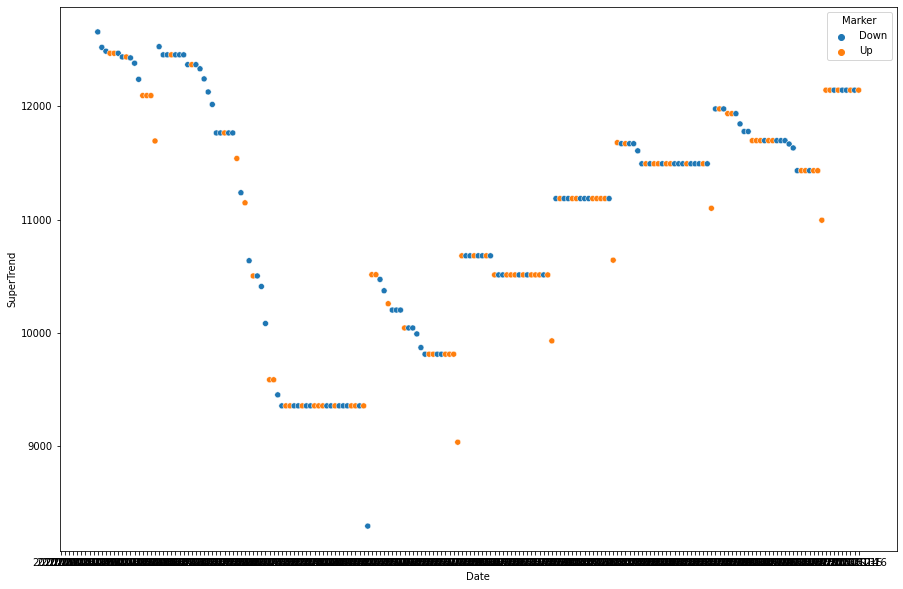

In [251]:
figdims=(15,10)
fig ,ax = plt.subplots(figsize=figdims)
sns.scatterplot(x=dfd['Date'] , y=dfd['SuperTrend'] , hue =dfd['Marker'] , ax=ax)

In [252]:
dfd['ST_Up'] = np.nan
dfd['ST_Down'] = np.nan
for i in range(len(dfd['Marker'])):
  if dfd['Marker'][i] =='Up':
    dfd['ST_Up'][i] = dfd['SuperTrend'][i] 
  else :
    dfd['ST_Down'][i] = dfd['SuperTrend'][i]  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [253]:
dfd

,Date,Day,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Percentage Change,Marker,Pivot,R1,R2,S1,S2,NIFTY,Moving Average 5,Moving Average 10,Moving Average 20,Moving Average 50,fib,TR,ATR,Upper Basic,Lower Basic,Upper Band,Lower Band,SuperTrend,ST_Up,ST_Down
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2020-01-01,Wednesday,12202.15,12222.20,12165.30,12182.50,304078039,10445.68,-0.1965,Down,NaN,NaN,NaN,NaN,NaN,12182.50,NaN,NaN,NaN,NaN,-19.65,56.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,Thursday,12198.55,12289.90,12195.25,12282.20,407697594,15256.55,0.8365,Up,12190.000000,12214.700000,12246.900000,12197.500000,12133.100000,12282.20,NaN,NaN,NaN,NaN,83.65,107.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,Friday,12261.10,12265.60,12191.35,12226.65,428770054,16827.27,-0.3445,Down,12255.783333,12316.316667,12350.433333,12229.366667,12161.133333,12226.65,NaN,NaN,NaN,NaN,-34.45,90.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-06,Monday,12170.60,12179.10,11974.20,11993.05,396501419,16869.22,-1.7755,Down,12227.866667,12264.383333,12302.116667,12229.083333,12153.616667,11993.05,NaN,NaN,NaN,NaN,-177.55,252.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-07,Tuesday,12079.10,12152.15,12005.35,12052.95,447818617,17797.68,-0.2615,Down,12048.783333,12123.366667,12253.683333,12104.516667,11843.883333,12052.95,12162.877778,NaN,NaN,NaN,-26.15,159.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2020-10-12,Monday,11973.55,12022.05,11867.20,11930.95,522627571,26586.47,-0.4260,Down,11886.000000,11966.800000,12019.400000,11857.800000,11752.600000,11930.95,11822.583333,11571.228,11296.60300,11392.69876,-42.60,154.85,167.173623,12446.145868,11443.104132,12144.21705,11443.104132,12144.21705,NaN,12144.21705
196,2020-10-13,Tuesday,11934.65,11988.20,11888.90,11934.50,458304851,29403.22,-0.0015,Down,11940.066667,12012.933333,12094.916667,11949.183333,11785.216667,11934.50,11883.005556,11666.501,11328.39525,11395.96876,-0.15,99.30,162.325507,12425.526520,11451.573480,12144.21705,11451.573480,12144.21705,NaN,12144.21705
197,2020-10-14,Wednesday,11917.40,11997.20,11822.15,11971.05,569245407,29940.62,0.5365,Up,11937.200000,11985.500000,12036.500000,11939.900000,11837.900000,11971.05,11921.766667,11752.834,11370.02500,11399.67684,53.65,175.05,163.234399,12399.378197,11419.971803,12144.21705,11451.573480,12144.21705,12144.21705,NaN


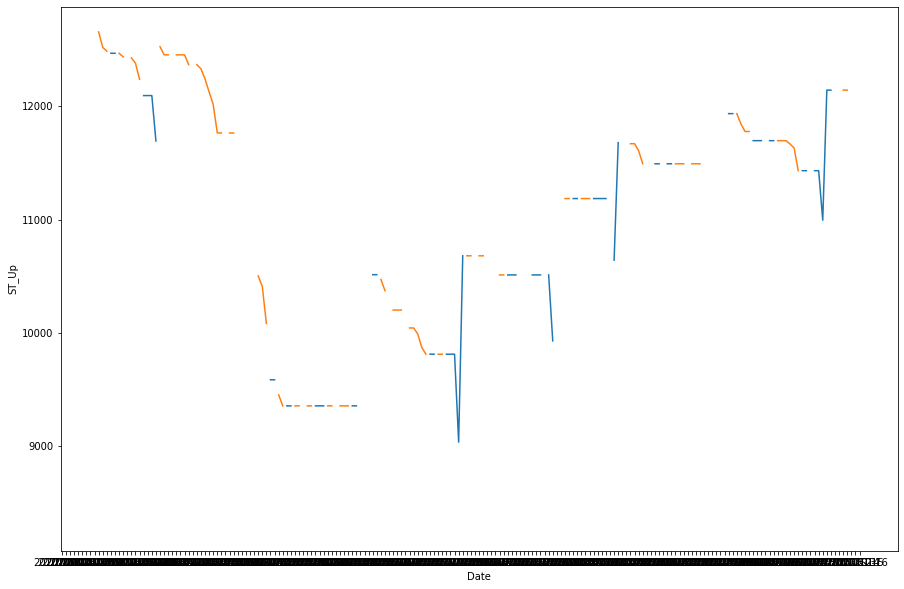

In [254]:
figdims=(15,10)
fig ,ax =plt.subplots(figsize=figdims)
sns.lineplot(x='Date' , y='ST_Up' , data=dfd , ax=ax)
sns.lineplot(x='Date' , y='ST_Down' , data=dfd , ax=ax)

In [255]:
dfd = dfd.rename(columns={'Shares Traded':'Volume'})

In [256]:
dfd.columns

Index(['Date', 'Day', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Turnover (Rs. Cr)', 'Percentage Change', 'Marker', 'Pivot', 'R1', 'R2',
       'S1', 'S2', 'NIFTY', 'Moving Average 5', 'Moving Average 10',
       'Moving Average 20', 'Moving Average 50', 'fib', 'TR', 'ATR',
       'Upper Basic', 'Lower Basic', 'Upper Band', 'Lower Band', 'SuperTrend',
       'ST_Up', 'ST_Down'],
      dtype='object')

Text(0.5, 1.0, 'Comparison of Volume & Supertrend Up-Down')

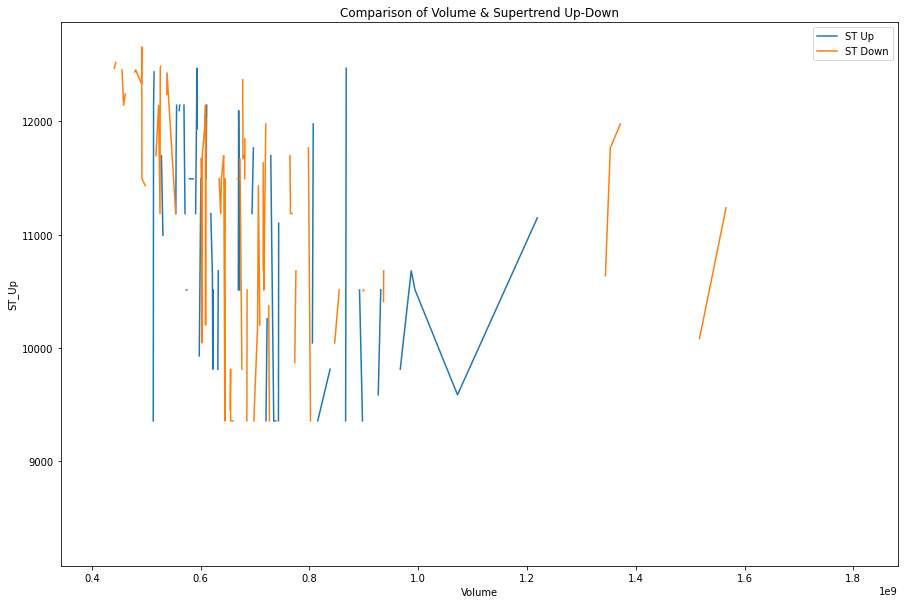

In [351]:
figdims=(15,10)
fig ,ax =plt.subplots(figsize=figdims)
sns.lineplot(x='Volume' , y='ST_Up' ,label='ST Up', data=dfd , ax=ax)
sns.lineplot(x='Volume' , y='ST_Down' , data=dfd ,label='ST Down', ax=ax)
plt.title('Comparison of Volume & Supertrend Up-Down')

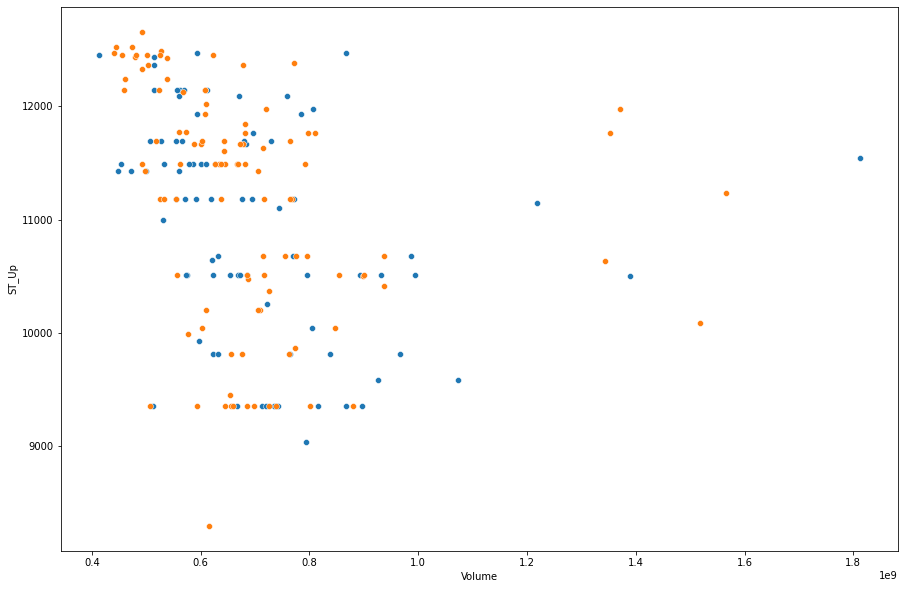

In [258]:
figdims=(15,10)
fig ,ax =plt.subplots(figsize=figdims)
sns.scatterplot(x='Volume' , y='ST_Up' , data=dfd , ax=ax)
sns.scatterplot(x='Volume' , y='ST_Down' , data=dfd , ax=ax)

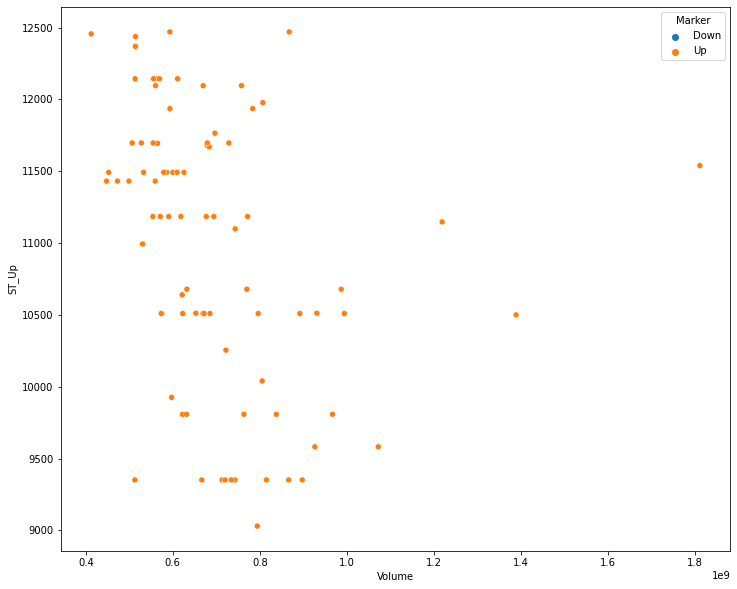

In [259]:
figdims=(12,10)
fig ,ax = plt.subplots(figsize=figdims)
sns.scatterplot(x='Volume' , y='ST_Up' , hue='Marker' , data=dfd , ax=ax)

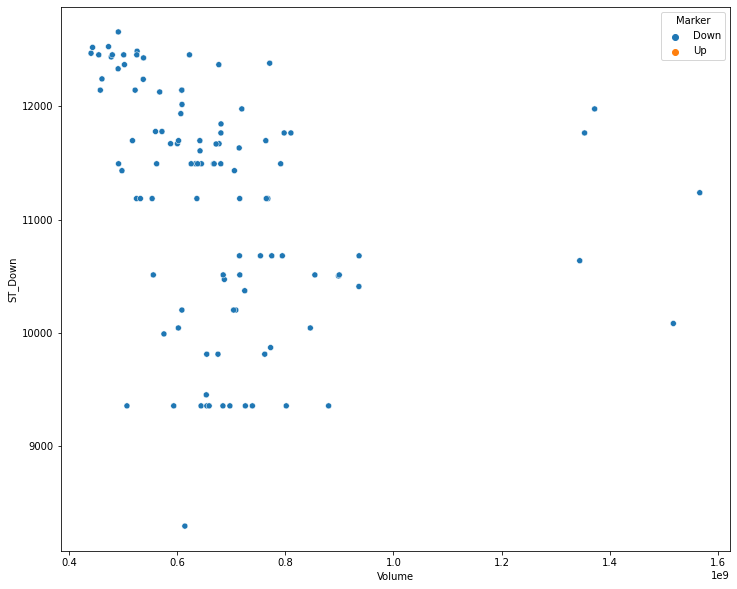

In [260]:
figdims=(12,10)
fig ,ax = plt.subplots(figsize=figdims)
sns.scatterplot(x='Volume' , y='ST_Down' , hue='Marker' , data=dfd , ax=ax)

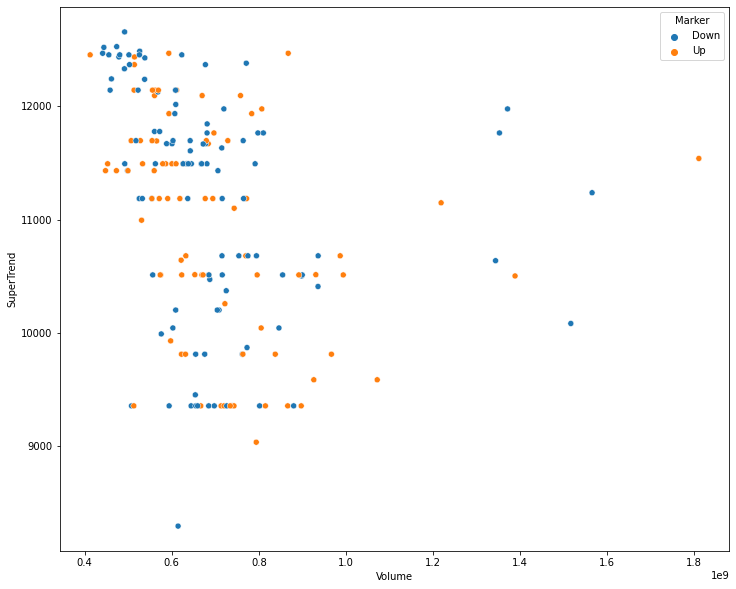

In [261]:
figdims=(12,10)
fig ,ax = plt.subplots(figsize=figdims)
sns.scatterplot(x='Volume' , y='SuperTrend' , hue='Marker' , data=dfd , ax=ax)

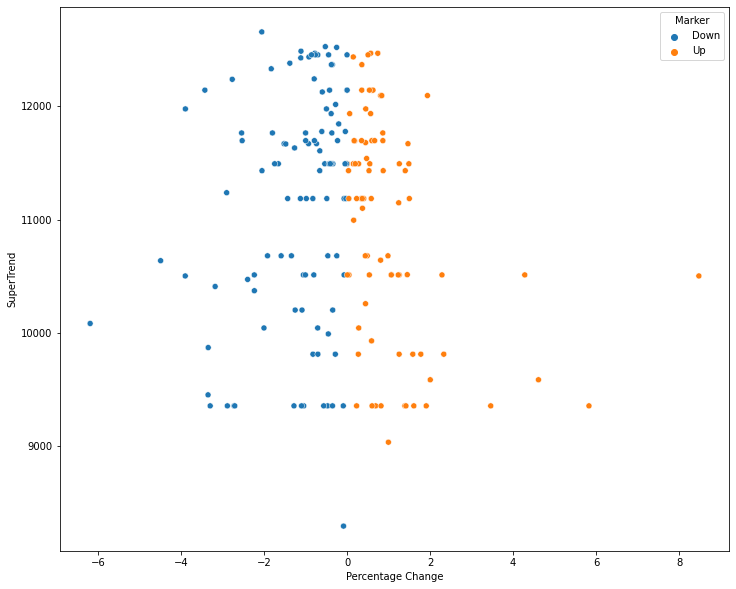

In [262]:
figdims=(12,10)
fig ,ax = plt.subplots(figsize=figdims)
sns.scatterplot(x='Percentage Change' , y='SuperTrend' , hue='Marker' , data=dfd , ax=ax)

Text(0.5, 1.0, 'Comparison between Supertrend on Days')

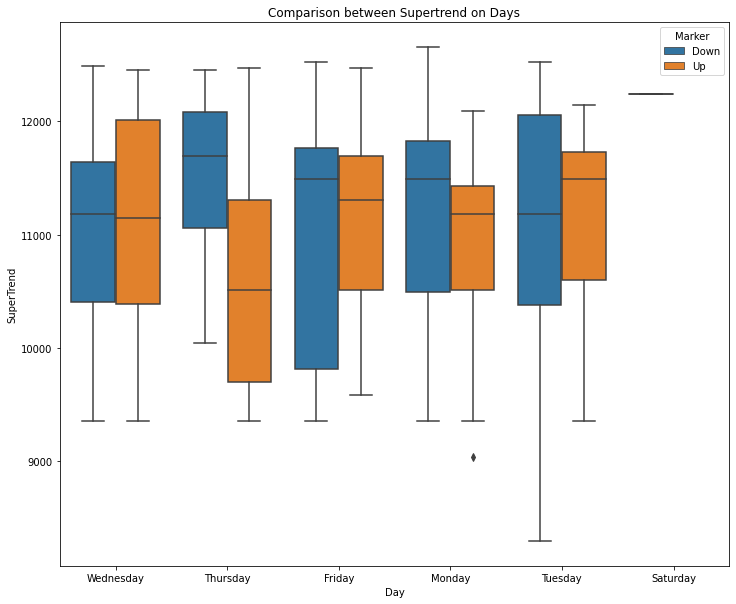

In [348]:
figdims=(12,10)
fig ,ax = plt.subplots(figsize=figdims)
sns.boxplot(x='Day' , y='SuperTrend' , hue='Marker' , data=dfd , ax=ax)
plt.title('Comparison between Supertrend on Days')

Text(0.5, 1.0, 'Comparison between Volume , True Range')

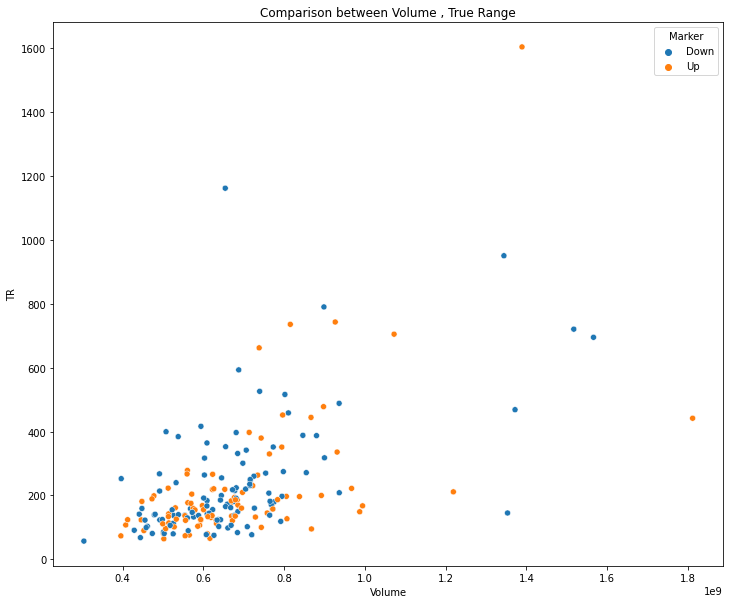

In [347]:
figdims=(12,10)
fig ,ax = plt.subplots(figsize=figdims)
sns.scatterplot(x='Volume' , y='TR' , hue='Marker' , data=dfd , ax=ax)
plt.title('Comparison between Volume , True Range')

In [266]:
dfd.columns

Index(['Date', 'Day', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Turnover (Rs. Cr)', 'Percentage Change', 'Marker', 'Pivot', 'R1', 'R2',
       'S1', 'S2', 'NIFTY', 'Moving Average 5', 'Moving Average 10',
       'Moving Average 20', 'Moving Average 50', 'fib', 'TR', 'ATR',
       'Upper Basic', 'Lower Basic', 'Upper Band', 'Lower Band', 'SuperTrend',
       'ST_Up', 'ST_Down'],
      dtype='object')

Text(0.5, 1.0, 'Comparison between MA5,MA10,MA20,MA50')

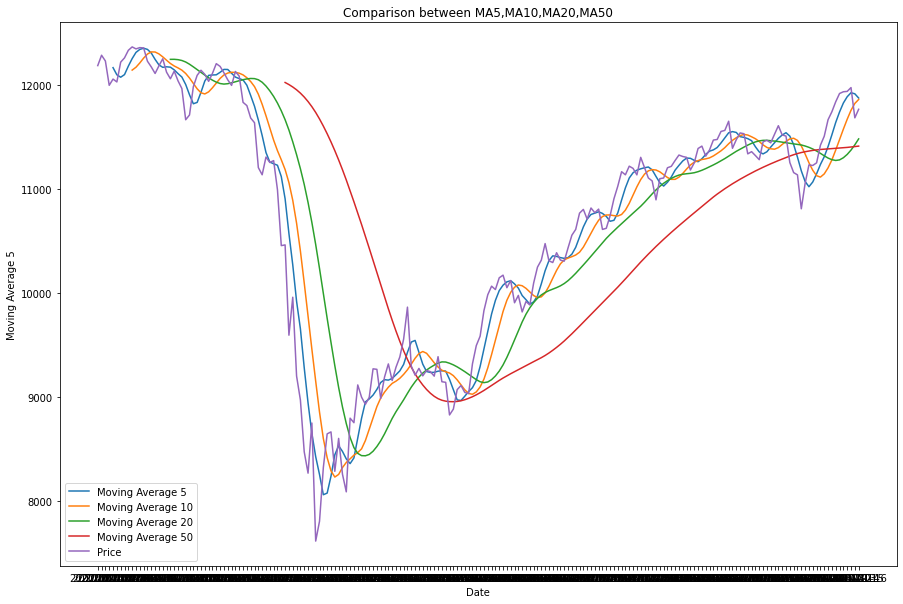

In [354]:
figdims=(15,10)
fig ,ax =plt.subplots(figsize=figdims)
sns.lineplot(x='Date' , y='Moving Average 5' , label='Moving Average 5',ax=ax , data=dfd)
sns.lineplot(x='Date' , y='Moving Average 10' , label='Moving Average 10',ax=ax, data=dfd)
sns.lineplot(x='Date' , y='Moving Average 20' , label='Moving Average 20',ax=ax, data=dfd)
sns.lineplot(x='Date' , y='Moving Average 50' , label='Moving Average 50',ax=ax, data=dfd)
sns.lineplot(x='Date' , y='Close' , label='Price' , ax=ax , data=dfd)
plt.title('Comparison between MA5,MA10,MA20,MA50')

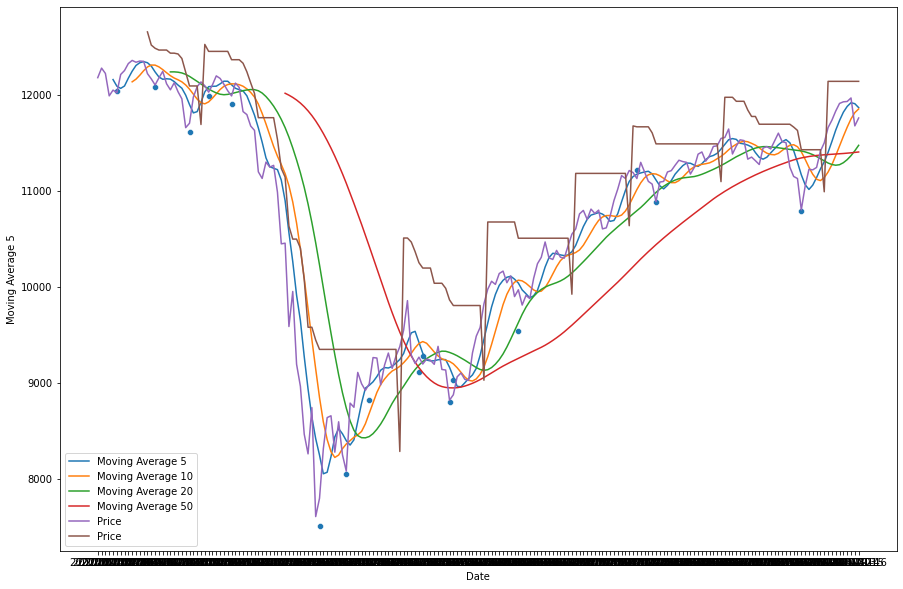

In [273]:
figdims=(15,10)
fig ,ax =plt.subplots(figsize=figdims)
sns.lineplot(x='Date' , y='Moving Average 5' , label='Moving Average 5',ax=ax , data=dfd)
sns.lineplot(x='Date' , y='Moving Average 10' , label='Moving Average 10',ax=ax, data=dfd)
sns.lineplot(x='Date' , y='Moving Average 20' , label='Moving Average 20',ax=ax, data=dfd)
sns.lineplot(x='Date' , y='Moving Average 50' , label='Moving Average 50',ax=ax, data=dfd)
sns.lineplot(x='Date' , y='Close' , label='Price' , ax=ax , data=dfd)
sns.lineplot(x='Date' , y='SuperTrend' , label='Price' , ax=ax , data=dfd)


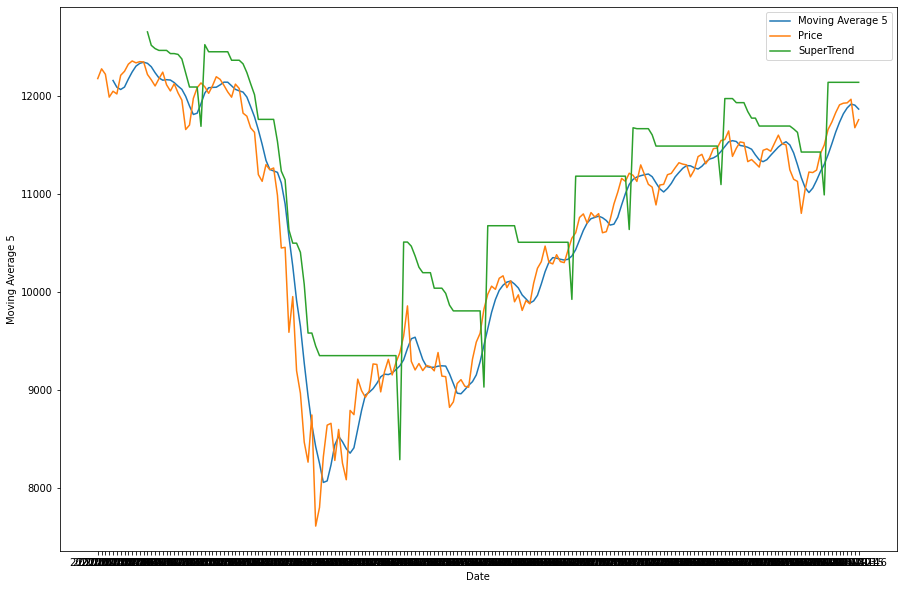

In [275]:
figdims=(15,10)
fig ,ax =plt.subplots(figsize=figdims)
sns.lineplot(x='Date' , y='Moving Average 5' , label='Moving Average 5',ax=ax , data=dfd)
sns.lineplot(x='Date' , y='Close' , label='Price' , ax=ax , data=dfd)
sns.lineplot(x='Date' , y='SuperTrend' , label='SuperTrend' , ax=ax , data=dfd)


Text(0.5, 1.0, 'Comparison between Upper Band ,Lower Band,Close')

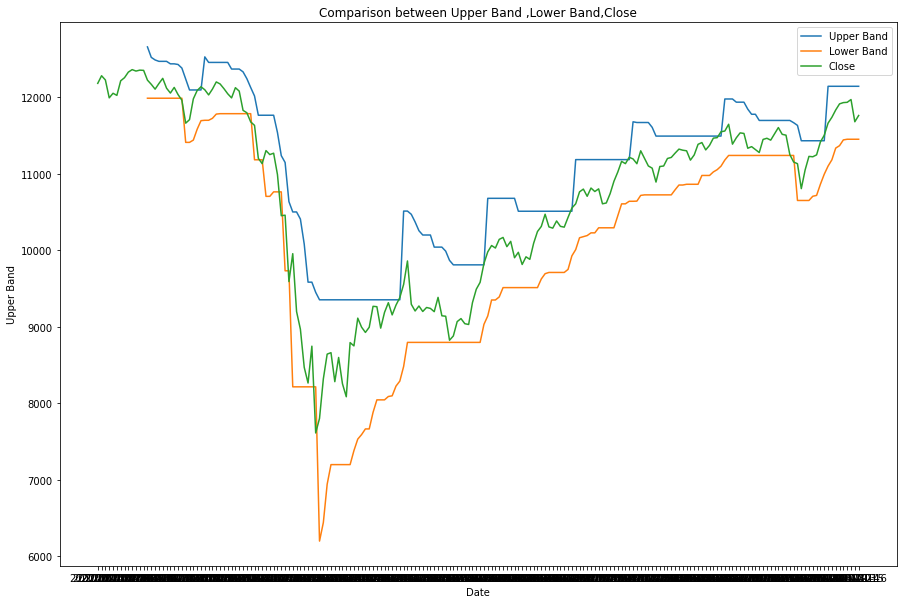

In [345]:
figdims=(15,10)
fig ,ax =plt.subplots(figsize=figdims)
sns.lineplot(x=dfd['Date'] , y=dfd['Upper Band'],label='Upper Band' , ax=ax)
sns.lineplot(x=dfd['Date'] , y=dfd['Lower Band'],label='Lower Band' ,ax=ax)
sns.lineplot(x=dfd['Date'] , y=dfd['Close'],label='Close' ,ax=ax)
plt.title('Comparison between Upper Band ,Lower Band,Close')

Text(0.5, 1.0, 'Comparison between Upper Band ,Lower Band,Close ,MA5')

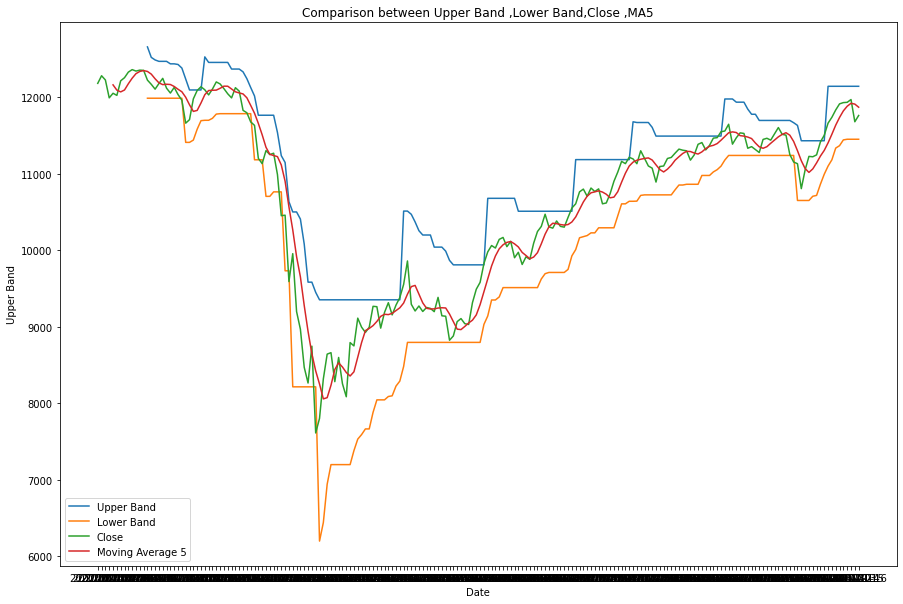

In [344]:
figdims=(15,10)
fig ,ax =plt.subplots(figsize=figdims)
sns.lineplot(x=dfd['Date'] , y=dfd['Upper Band'],label='Upper Band' , ax=ax)
sns.lineplot(x=dfd['Date'] , y=dfd['Lower Band'],label='Lower Band' ,ax=ax)
sns.lineplot(x=dfd['Date'] , y=dfd['Close'],label='Close' ,ax=ax)
sns.lineplot(x=dfd['Date'] , y=dfd['Moving Average 5'],label='Moving Average 5' ,ax=ax)
plt.title('Comparison between Upper Band ,Lower Band,Close ,MA5')

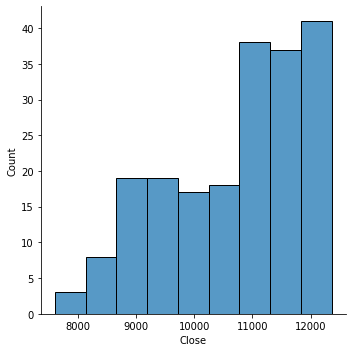

In [282]:
sns.distplot(x=dfd['Close'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



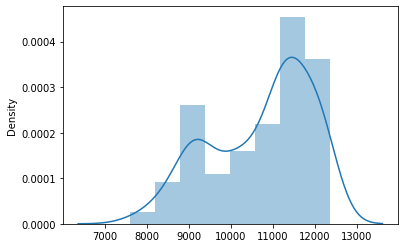

In [284]:
sns.distplot(x=dfd['Close'])

In [286]:
dfd.to_csv('f.csv')

In [287]:
r = pd.read_csv('/content/drive/MyDrive/python/RSI.csv')

In [294]:
df2 = pd.merge(dfd, r, left_index=True, right_index=True, how='outer')

In [295]:
df2

,Date,Day,Open,High,Low,Close,Volume,Turnover (Rs. Cr),Percentage Change,Marker,Pivot,R1,R2,S1,S2,NIFTY,Moving Average 5,Moving Average 10,Moving Average 20,Moving Average 50,fib,TR,ATR,Upper Basic,Lower Basic,Upper Band,Lower Band,SuperTrend,ST_Up,ST_Down,Unnamed: 0,RSI,DATE
0,2020-01-01,Wednesday,12202.15,12222.20,12165.30,12182.50,304078039,10445.68,-0.1965,Down,NaN,NaN,NaN,NaN,NaN,12182.50,NaN,NaN,NaN,NaN,-19.65,56.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,01-01-2020
1,2020-01-02,Thursday,12198.55,12289.90,12195.25,12282.20,407697594,15256.55,0.8365,Up,12190.000000,12214.700000,12246.900000,12197.500000,12133.100000,12282.20,NaN,NaN,NaN,NaN,83.65,107.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,02-01-2020
2,2020-01-03,Friday,12261.10,12265.60,12191.35,12226.65,428770054,16827.27,-0.3445,Down,12255.783333,12316.316667,12350.433333,12229.366667,12161.133333,12226.65,NaN,NaN,NaN,NaN,-34.45,90.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,03-01-2020
3,2020-01-06,Monday,12170.60,12179.10,11974.20,11993.05,396501419,16869.22,-1.7755,Down,12227.866667,12264.383333,12302.116667,12229.083333,12153.616667,11993.05,NaN,NaN,NaN,NaN,-177.55,252.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,06-01-2020
4,2020-01-07,Tuesday,12079.10,12152.15,12005.35,12052.95,447818617,17797.68,-0.2615,Down,12048.783333,12123.366667,12253.683333,12104.516667,11843.883333,12052.95,12162.877778,NaN,NaN,NaN,-26.15,159.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,07-01-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2020-10-12,Monday,11973.55,12022.05,11867.20,11930.95,522627571,26586.47,-0.4260,Down,11886.000000,11966.800000,12019.400000,11857.800000,11752.600000,11930.95,11822.583333,11571.228,11296.60300,11392.69876,-42.60,154.85,167.173623,12446.145868,11443.104132,12144.21705,11443.104132,12144.21705,NaN,12144.21705,195.0,68.545922,13-10-2020
196,2020-10-13,Tuesday,11934.65,11988.20,11888.90,11934.50,458304851,29403.22,-0.0015,Down,11940.066667,12012.933333,12094.916667,11949.183333,11785.216667,11934.50,11883.005556,11666.501,11328.39525,11395.96876,-0.15,99.30,162.325507,12425.526520,11451.573480,12144.21705,11451.573480,12144.21705,NaN,12144.21705,196.0,69.496846,14-10-2020
197,2020-10-14,Wednesday,11917.40,11997.20,11822.15,11971.05,569245407,29940.62,0.5365,Up,11937.200000,11985.500000,12036.500000,11939.900000,11837.900000,11971.05,11921.766667,11752.834,11370.02500,11399.67684,53.65,175.05,163.234399,12399.378197,11419.971803,12144.21705,11451.573480,12144.21705,12144.21705,NaN,197.0,55.202288,15-10-2020
198,2020-10-15,Thursday,12023.45,12025.45,11661.30,11680.35,608865041,35175.92,-3.4310,Down,11930.133333,12038.116667,12105.183333,11889.216667,11755.083333,11680.35,11911.338889,11818.656,11420.84400,11403.91100,-343.10,364.15,177.585513,12376.131540,11310.618460,12144.21705,11451.573480,12144.21705,NaN,12144.21705,198.0,57.839797,16-10-2020


In [297]:
df2 = df2.drop(columns=['DATE' ,'Unnamed: 0'])

In [298]:
df2

,Date,Day,Open,High,Low,Close,Volume,Turnover (Rs. Cr),Percentage Change,Marker,Pivot,R1,R2,S1,S2,NIFTY,Moving Average 5,Moving Average 10,Moving Average 20,Moving Average 50,fib,TR,ATR,Upper Basic,Lower Basic,Upper Band,Lower Band,SuperTrend,ST_Up,ST_Down,RSI
0,2020-01-01,Wednesday,12202.15,12222.20,12165.30,12182.50,304078039,10445.68,-0.1965,Down,NaN,NaN,NaN,NaN,NaN,12182.50,NaN,NaN,NaN,NaN,-19.65,56.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,Thursday,12198.55,12289.90,12195.25,12282.20,407697594,15256.55,0.8365,Up,12190.000000,12214.700000,12246.900000,12197.500000,12133.100000,12282.20,NaN,NaN,NaN,NaN,83.65,107.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,Friday,12261.10,12265.60,12191.35,12226.65,428770054,16827.27,-0.3445,Down,12255.783333,12316.316667,12350.433333,12229.366667,12161.133333,12226.65,NaN,NaN,NaN,NaN,-34.45,90.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-06,Monday,12170.60,12179.10,11974.20,11993.05,396501419,16869.22,-1.7755,Down,12227.866667,12264.383333,12302.116667,12229.083333,12153.616667,11993.05,NaN,NaN,NaN,NaN,-177.55,252.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-07,Tuesday,12079.10,12152.15,12005.35,12052.95,447818617,17797.68,-0.2615,Down,12048.783333,12123.366667,12253.683333,12104.516667,11843.883333,12052.95,12162.877778,NaN,NaN,NaN,-26.15,159.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2020-10-12,Monday,11973.55,12022.05,11867.20,11930.95,522627571,26586.47,-0.4260,Down,11886.000000,11966.800000,12019.400000,11857.800000,11752.600000,11930.95,11822.583333,11571.228,11296.60300,11392.69876,-42.60,154.85,167.173623,12446.145868,11443.104132,12144.21705,11443.104132,12144.21705,NaN,12144.21705,68.545922
196,2020-10-13,Tuesday,11934.65,11988.20,11888.90,11934.50,458304851,29403.22,-0.0015,Down,11940.066667,12012.933333,12094.916667,11949.183333,11785.216667,11934.50,11883.005556,11666.501,11328.39525,11395.96876,-0.15,99.30,162.325507,12425.526520,11451.573480,12144.21705,11451.573480,12144.21705,NaN,12144.21705,69.496846
197,2020-10-14,Wednesday,11917.40,11997.20,11822.15,11971.05,569245407,29940.62,0.5365,Up,11937.200000,11985.500000,12036.500000,11939.900000,11837.900000,11971.05,11921.766667,11752.834,11370.02500,11399.67684,53.65,175.05,163.234399,12399.378197,11419.971803,12144.21705,11451.573480,12144.21705,12144.21705,NaN,55.202288
198,2020-10-15,Thursday,12023.45,12025.45,11661.30,11680.35,608865041,35175.92,-3.4310,Down,11930.133333,12038.116667,12105.183333,11889.216667,11755.083333,11680.35,11911.338889,11818.656,11420.84400,11403.91100,-343.10,364.15,177.585513,12376.131540,11310.618460,12144.21705,11451.573480,12144.21705,NaN,12144.21705,57.839797


Text(0.5, 1.0, 'RSI')

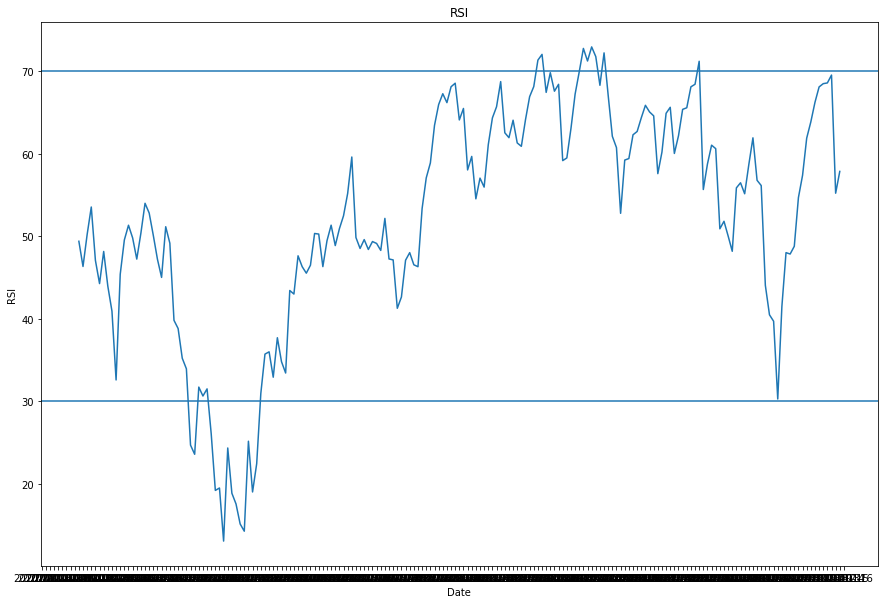

In [355]:
figdims=(15,10)
fig ,ax =plt.subplots(figsize=figdims)
graph = sns.lineplot(x='Date' , y='RSI' , data=df2 , ax=ax)
graph.axhline(70)
graph.axhline(30)
plt.title('RSI')

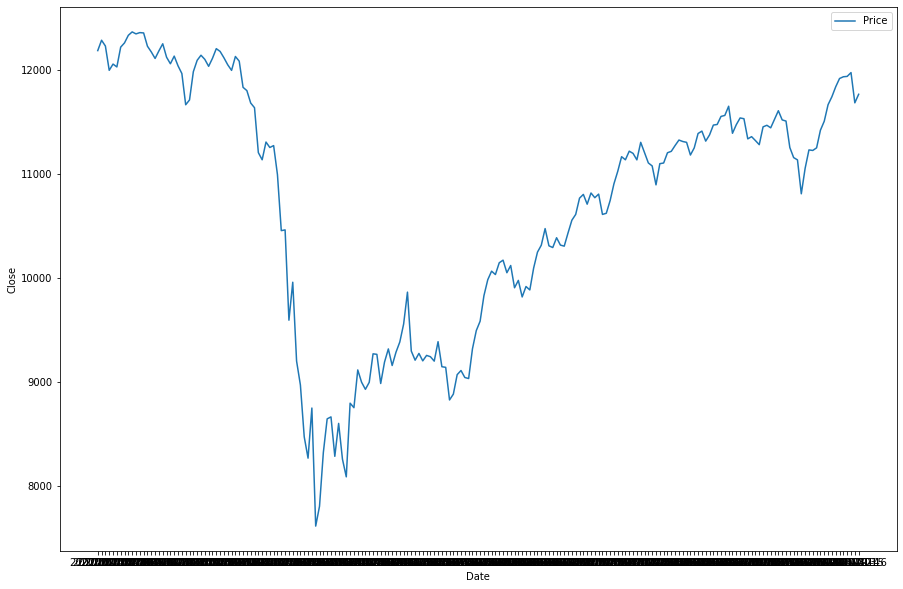

In [325]:
figdims=(15,10)
fig ,ax =plt.subplots(figsize=figdims)
sns.lineplot(x='Date' , y='Close' , label='Price' , ax=ax , data=dfd)

In [310]:
def rsimarker(df):
  if df['RSI'] >=70:
    df['RSIMarker'] = 'Overbought'
  elif df['RSI']<=30:
    df['RSIMarker'] =  'Oversold'
  else:
    df['RSIMarker'] = '.'    

In [311]:
rsimarker(df2)

ValueError: ignored

In [319]:
df2['RSIMarker'] = np.nan
for i in range(len(df2['Close'])):
  if df2['RSI'] >70:
    df2['RSIMarker'] = 'Overbought'
  elif df2['RSI'] ==70:  
    df2['RSIMarker'] = 'Overbought'
  elif df2['RSI']<30:
     df2['RSIMarker'] =  'Oversold'
  elif df2['RSI']==30:
     df2['RSIMarker'] =  'Oversold'   
  else:
    df2['RSIMarker'] = '.'    

ValueError: ignored

Text(0.5, 1.0, 'Comparison between Close & RSI')

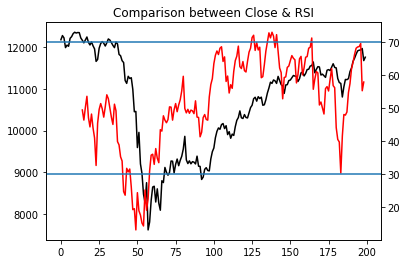

In [330]:
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_left.plot(df2['Close'], color='black')
ax_right.plot(df2['RSI'], color='red')
ax_right.axhline(70)
ax_right.axhline(30)
plt.title('Comparison between Close & RSI')

Text(0.5, 1.0, 'Comparison between Close & RSI')

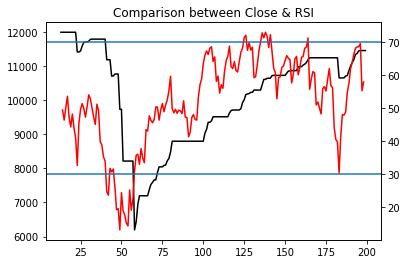

In [336]:
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_left.plot(df2['Lower Band'], color='black')
ax_right.plot(df2['RSI'], color='red')
ax_right.axhline(70)
ax_right.axhline(30)
plt.title('Comparison between Close & RSI')

Text(0.5, 1.0, 'Comparison between Moving Average 5 & RSI')

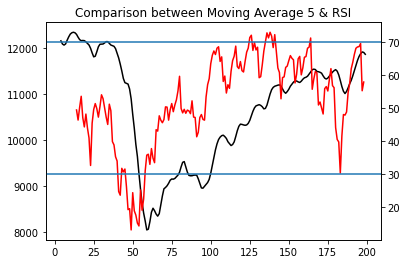

In [342]:
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_left.plot(df2['Moving Average 5'], color='black')
ax_right.plot(df2['RSI'], color='red')
ax_right.axhline(70)
ax_right.axhline(30)
plt.title('Comparison between Moving Average 5 & RSI')

Text(0.5, 1.0, 'Comparison between Moving Average 10 & RSI')

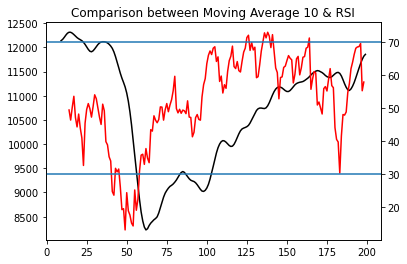

In [338]:
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_left.plot(df2['Moving Average 10'], color='black')
ax_right.plot(df2['RSI'], color='red')
ax_right.axhline(70)
ax_right.axhline(30)
plt.title('Comparison between Moving Average 10 & RSI')

Text(0.5, 1.0, 'Comparison between Moving Average 20 & RSI')

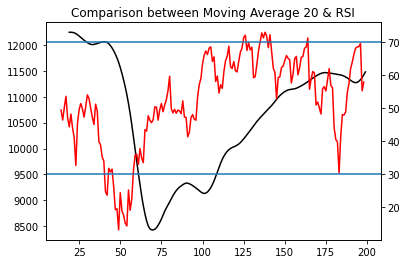

In [340]:
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_left.plot(df2['Moving Average 20'], color='black')
ax_right.plot(df2['RSI'], color='red')
ax_right.axhline(70)
ax_right.axhline(30)
plt.title('Comparison between Moving Average 20 & RSI')

Text(0.5, 1.0, 'Comparison between Volume & RSI')

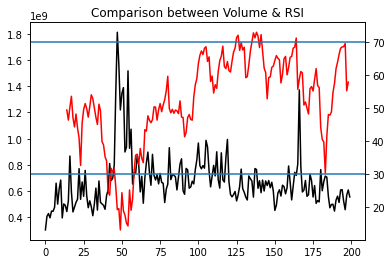

In [341]:
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_left.plot(df2['Volume'], color='black')
ax_right.plot(df2['RSI'], color='red')
ax_right.axhline(70)
ax_right.axhline(30)
plt.title('Comparison between Volume & RSI')

Text(0.5, 1.0, 'Comparison between Volume & RSI')

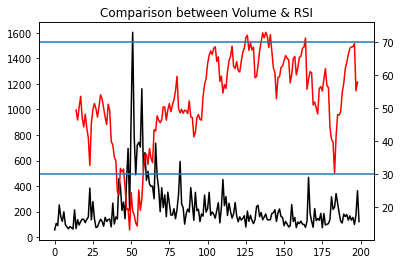

In [356]:
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_left.plot(df2['TR'], color='black')
ax_right.plot(df2['RSI'], color='red')
ax_right.axhline(70)
ax_right.axhline(30)
plt.title('Comparison between Volume & RSI')

In [357]:
df2['TR'].mean()

228.51374999999996